In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests


In [ ]:
e_commerce=pd.read_csv('e_commerce_finalcleanns.csv',sep=",")
e_commerce.head(10)

formapping=pd.read_csv('formapping.csv',sep=";")
formapping2=formapping.drop(labels=9, axis=0)
formapping2

,0,Country,Total_Amount,Country_Codes
0,1,Belgium,119.56,BEL
1,2,Eire,4290.94,IRL
2,3,France,560.90,FRA
3,4,Germany,90.45,DEU
4,5,Hong Kong,91.39,HKG
5,6,Netherlands,122.04,NLD
6,7,Portugal,60.00,PRT
7,8,Spain,17.34,ESP
8,9,Switzerland,2151.80,CHE


In [ ]:
e_commerce=e_commerce.drop(['Unnamed: 0'],axis=1)
e_commerce

,Description,Quantity,Unit_Price,Country,Invoice_Date,Number_Of_Visit,Customer_Gender,Customer_Age,Rating_Of_Product
0,Set Of 6 Ribbons Vintage Christmas,1.0,2.89,United Kingdom,10/18/2011 14:00,101.0,Male,36.0,2.0
1,Kings Choice Mug,12.0,1.25,United Kingdom,02/01/2011 10:38,110.0,Male,33.0,2.0
2,Round Snack Boxes Set Of4 Woodland,12.0,2.08,Germany,06/05/2011 13:45,116.0,Male,39.0,2.0
3,Vintage Donkey Tail Game,36.0,3.39,Netherlands,12/07/2011 15:16,107.0,Male,29.0,3.0
4,3D Sheet Of Dog Stickers,3.0,1.66,United Kingdom,06/27/2011 09:12,101.0,Male,38.0,2.0
...,...,...,...,...,...,...,...,...,...
312,Vintage Snakes & Ladders,4.0,3.75,United Kingdom,11/04/2011 13:05,135.0,Female,44.0,3.0
313,Hand Warmer Scotty Dog Design,3.0,2.08,United Kingdom,09/21/2011 15:39,98.0,Female,40.0,2.0
314,Ribbon Reel Hearts Design,6.0,2.08,United Kingdom,02/08/2011 12:12,96.0,Female,34.0,2.0
315,Bread Bin Diner Style Ivory,2.0,16.95,Eire,07/28/2011 17:00,105.0,Female,41.0,11.0


In [ ]:
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Description        317 non-null    object 
 1   Quantity           317 non-null    float64
 2   Unit_Price         317 non-null    float64
 3   Country            317 non-null    object 
 4   Invoice_Date       317 non-null    object 
 5   Number_Of_Visit    317 non-null    float64
 6   Customer_Gender    317 non-null    object 
 7   Customer_Age       317 non-null    float64
 8   Rating_Of_Product  317 non-null    float64
dtypes: float64(5), object(4)
memory usage: 22.4+ KB


Text(0.5, 1.0, 'Distribution Of Countries')

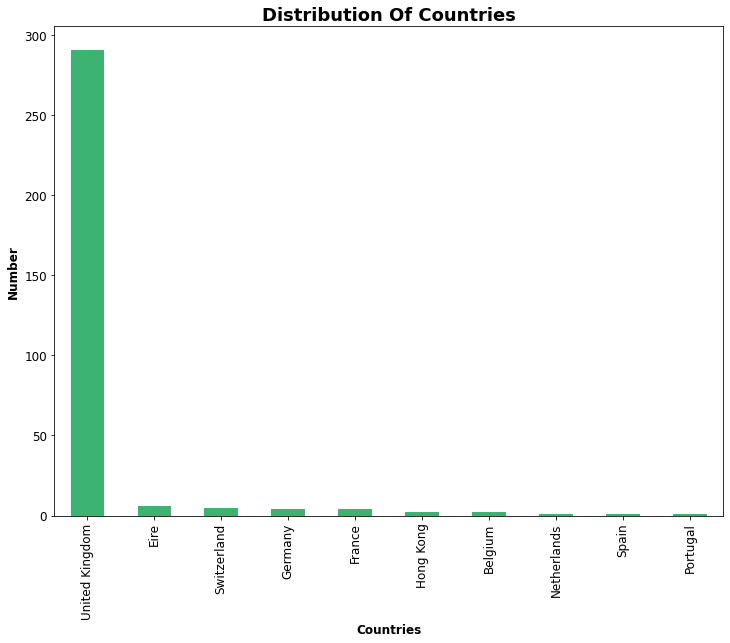

In [ ]:
#What is the frequency distribution of Countries?
e_commerce['Country'].value_counts().plot(kind = 'bar', figsize = (12,9), color = ['mediumseagreen'],
                                    fontsize = 12)
plt.xlabel('Countries', fontsize=12,fontname='DejaVu Sans',fontweight = "bold")
plt.ylabel('Number', fontsize=12,fontname='DejaVu Sans',fontweight = "bold")
plt.title('Distribution Of Countries', fontsize = 18,fontname='DejaVu Sans',fontweight = "bold")

In [ ]:
#We will run to this codeblock to delete outlier values in Quantity and Unit_Price rows
#e_commerce.drop(e_commerce[e_commerce['Quantity'] >= 100].index, inplace = True),
#e_commerce.drop(e_commerce[e_commerce['Unit_Price'] >= 50].index, inplace = True),

x=e_commerce['Unit_Price']
y=e_commerce['Rating_Of_Product']
pearsons_coefficient = np.corrcoef(x, y)
pearsons_coefficient

array([[1.        , 0.70601562],
       [0.70601562, 1.        ]])

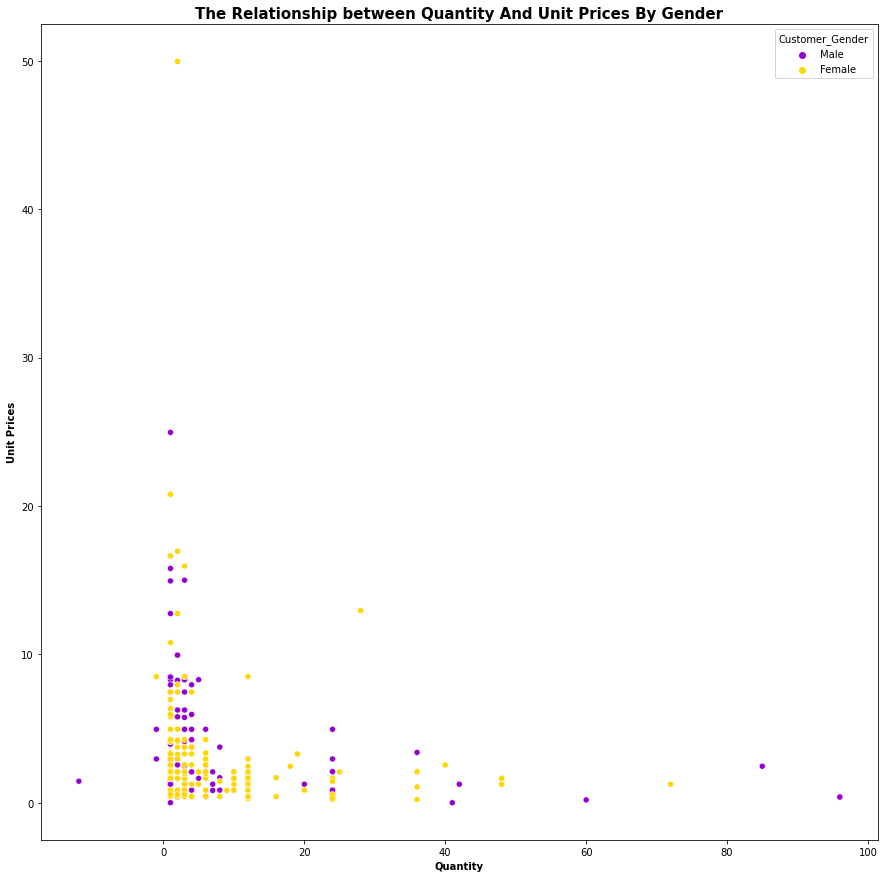

In [ ]:
# What is the relationship between quantity and unit prices by gender?
plt.figure(figsize = (15,15))   
sns.scatterplot(data=e_commerce, x="Quantity", y="Unit_Price",hue = 'Customer_Gender', palette = ['darkviolet','gold'])
plt.title('The Relationship between Quantity And Unit Prices By Gender',fontsize = 15, fontweight = "bold")
plt.xlabel('Quantity',fontsize=10,fontweight = "bold",)
plt.ylabel('Unit Prices',fontsize=10,fontweight = "bold")
plt.show()

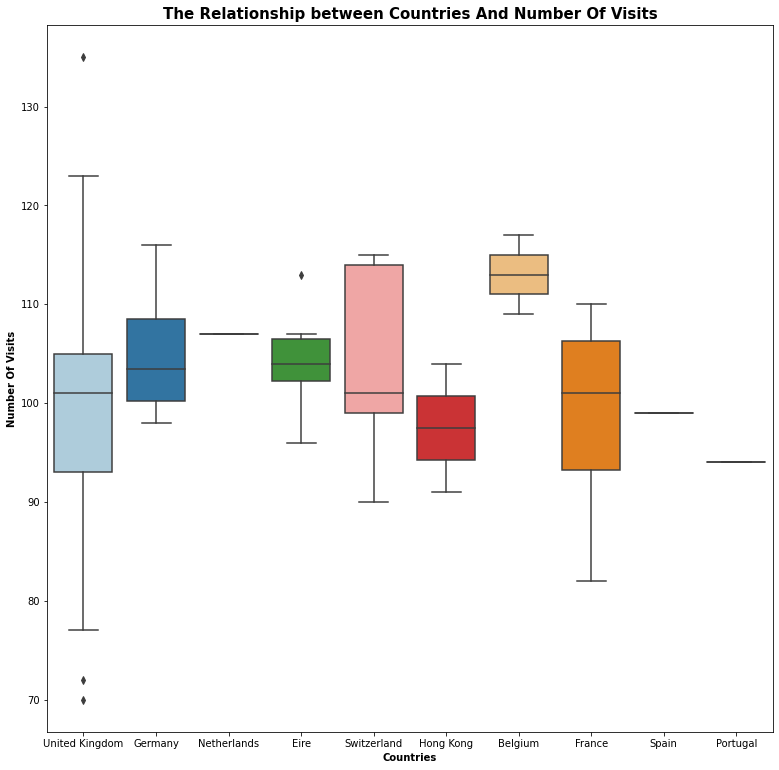

In [ ]:
# What connection exists between the country and the number of visits?
plt.figure(figsize = (13,13)) 
sns.boxplot(data=e_commerce, x="Country", y="Number_Of_Visit",
            palette = 'Paired')
plt.title('The Relationship between Countries And Number Of Visits',fontsize = 15, fontweight = "bold",fontname="DejaVu Sans")
plt.xlabel('Countries',fontsize = 10, fontweight = "bold",fontname="DejaVu Sans")
plt.ylabel('Number Of Visits',fontsize = 10, fontweight = "bold",fontname="DejaVu Sans")
plt.show()

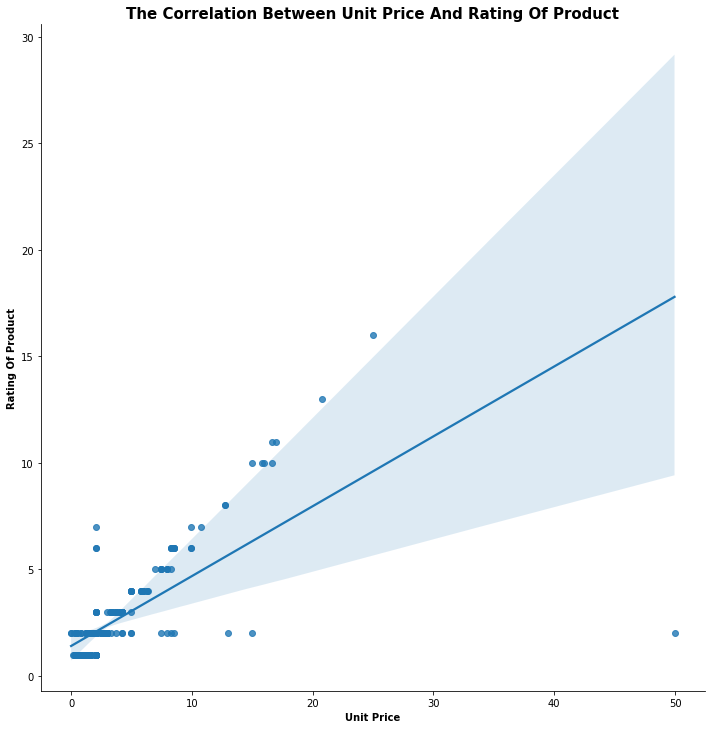

In [ ]:
#Is there a correlation between unit price and rating of product, if so, is this correlation negative or positive?
sns.lmplot(data=e_commerce, x="Unit_Price", y="Rating_Of_Product", height = 10)
plt.title('The Correlation Between Unit Price And Rating Of Product',fontsize = 15, fontweight = "bold",fontname="DejaVu Sans")
plt.xlabel('Unit Price',fontsize = 10, fontweight = "bold",fontname="DejaVu Sans")
plt.ylabel('Rating Of Product',fontsize = 10, fontweight = "bold",fontname="DejaVu Sans")
plt.show()


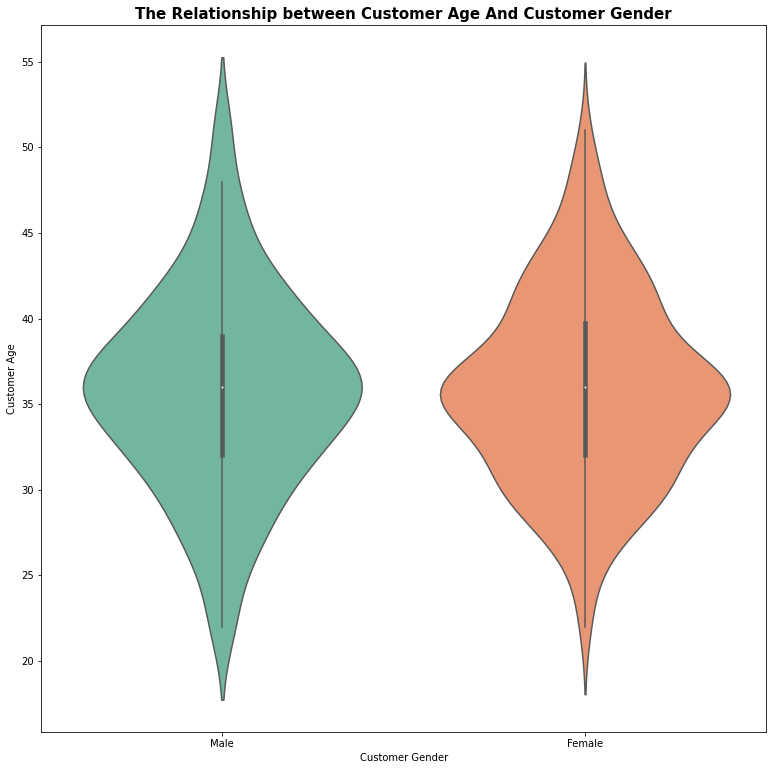

In [ ]:
#How do customer gender and customer age relate to one another?
plt.figure(figsize = (13,13))  
sns.violinplot(data=e_commerce, x="Customer_Gender", y="Customer_Age",
            palette = 'Set2')  
plt.title('The Relationship between Customer Age And Customer Gender',fontsize = 15, fontweight = "bold",fontname="Monaco")
plt.xlabel('Customer Gender')
plt.ylabel('Customer Age')
plt.show()

In [ ]:
teams_by_country = e_commerce.groupby('Country')

a=teams_by_country.aggregate({
    "Quantity": "sum",
    "Unit_Price": "sum",
})

a['Total_Amount'] = a['Quantity'] * a['Unit_Price']

In [ ]:
INDICATOR='The total amount of purchases by countries. (quantity x unit price)'
data=INDICATOR
max_year=e_commerce['Invoice_Date'].max()
a

,Quantity,Unit_Price,Total_Amount
Country,,,
Belgium,7.0,17.08,119.56
Eire,146.0,29.39,4290.94
France,71.0,7.90,560.90
Germany,15.0,6.03,90.45
Hong Kong,13.0,7.03,91.39
Netherlands,36.0,3.39,122.04
Portugal,48.0,1.25,60.00
Spain,6.0,2.89,17.34
Switzerland,106.0,20.30,2151.80


In [ ]:
geojson_url="https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json"
response=requests.get(geojson_url)
geojson=response.json()

In [ ]:
# What is the total amounth distribution of Countries (Without United Kingdom) ?
M=folium.Map(location=[50,10],zoom_start=3.5)
folium.Choropleth(
    geo_data=geojson,
    data=formapping,
    columns=['Country_Codes','Total_Amount'],
    key_on='feature.id',
    fill_color='Spectral',
    fill_opacity=0.5,
    line_opacity=0.2,
    legend_name=INDICATOR
).add_to(M)
M 

 